In [33]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [15]:
%config IPCompleter.greedy=True

In [16]:
titanic_data = pd.read_csv('train.csv')

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = titanic_data['Survived']

In [20]:
X = pd.get_dummies(X)

In [21]:
X = X.fillna({"Age": X.Age.median()})

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [49]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(651.0, 792.75, 'X[6] <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(325.5, 566.25, 'X[0] <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(162.75, 339.75, 'X[1] <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(81.375, 113.25, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(244.125, 113.25, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]'),
 Text(488.25, 339.75, 'X[4] <= 23.35\nentropy = 0.996\nsamples = 99\nvalue = [53, 46]'),
 Text(406.875, 113.25, 'entropy = 0.991\nsamples = 81\nvalue = [36, 45]'),
 Text(569.625, 113.25, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(976.5, 566.25, 'X[1] <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(813.75, 339.75, 'X[2] <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(732.375, 113.25, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(895.125, 113.25, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(1139.25, 339.75, 'X[4] <= 52.277

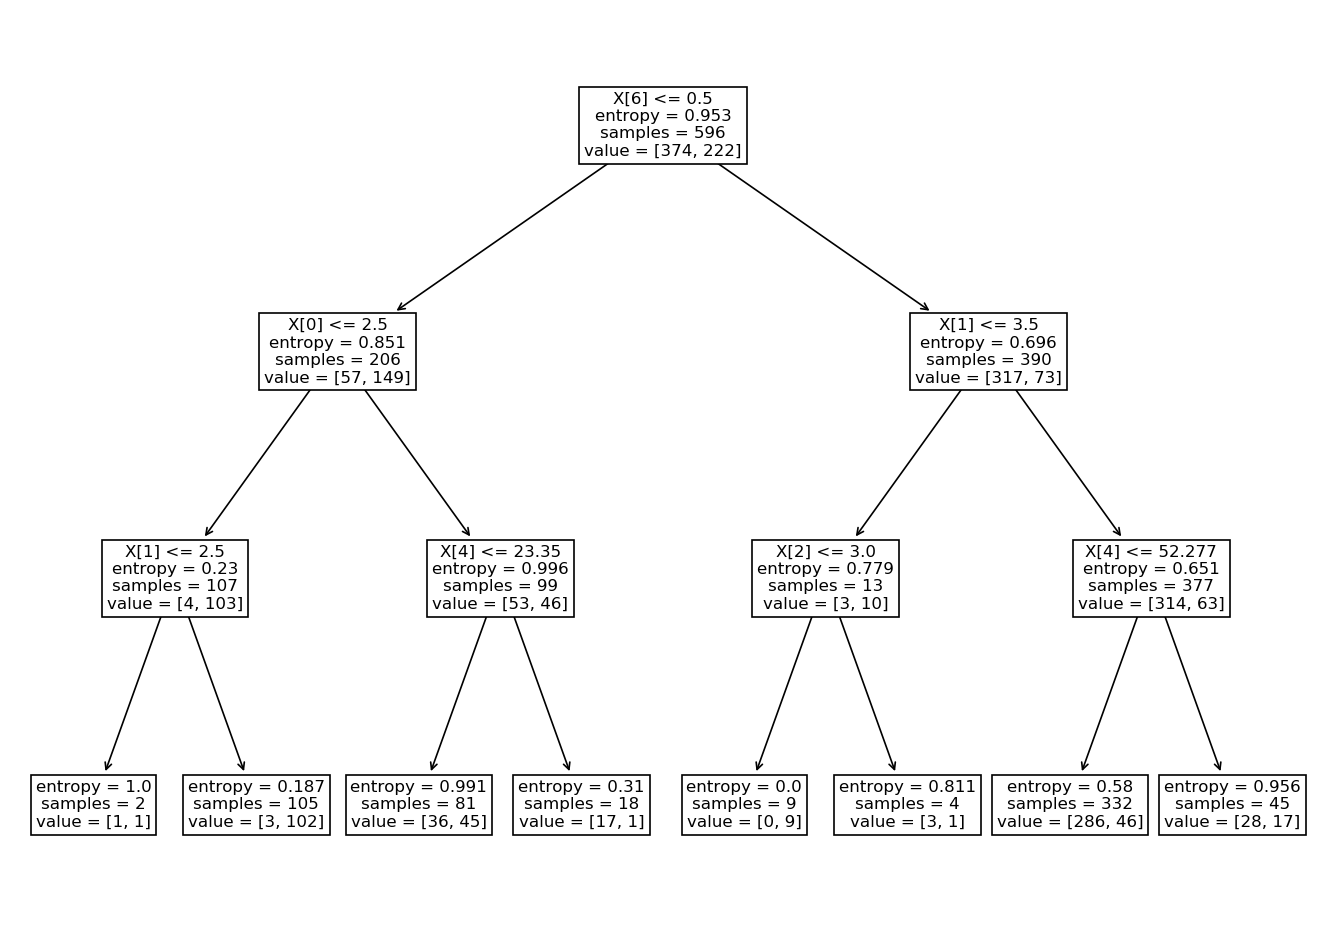

In [50]:
plt.figure(num=None, figsize=(14, 10), dpi=120, facecolor='w', edgecolor='k')

tree.plot_tree(clf, max_depth=3, fontsize=10)

In [51]:
clf.score(X_test, y_test)

0.8203389830508474

In [69]:
scores_data = pd.DataFrame(columns=["max_depth", "train_score", "test_score"])

for max_depth in range(1,100):
    clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf1.fit(X_train, y_train)
    train_score = clf1.score(X_train, y_train)
    test_score = clf1.score(X_test, y_test)
    scores_data = scores_data.append({"max_depth": max_depth, "train_score": train_score, "test_score": test_score}, ignore_index=True)


In [70]:
scores_data.head()

,max_depth,train_score,test_score
0,1.0,0.781879,0.796610
1,2.0,0.805369,0.776271
2,3.0,0.823826,0.820339
3,4.0,0.833893,0.823729
4,5.0,0.840604,0.810169


In [74]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"], value_vars=["test_score", "train_score"], var_name='set_type', value_name="score")

In [75]:
scores_data_long.head()

,max_depth,set_type,score
0,1.0,test_score,0.796610
1,2.0,test_score,0.776271
2,3.0,test_score,0.820339
3,4.0,test_score,0.823729
4,5.0,test_score,0.810169


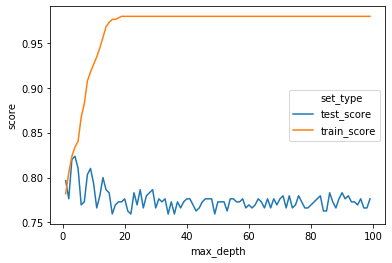

In [77]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)